# Lab03: Tiền xử lý và mô hình hóa dữ liệu


Họ tên: Đặng Văn Hiển

MSSV: 18120363

---

## Cách làm bài và nộp bài (bạn cần đọc kỹ)

&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác cũng như tham khảo các nguồn trên mạng, nhưng sau cùng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. Khi tham khảo các nguồn trên mạng thì bạn cần ghi rõ nguồn trong bài làm. Bạn không được tham khảo bài làm của các bạn năm trước (vì nếu làm vậy thì bao giờ bạn mới có thể tự mình suy nghĩ để giải quyết vấn đề); sau khi kết thúc môn học, bạn cũng không được đưa bài làm cho các bạn khóa sau hoặc public bài làm trên Github (vì nếu làm vậy thì sẽ ảnh hưởng tới việc học của các bạn khóa sau). Nếu bạn có thể làm theo những gì mình nói thì điểm của bạn có thể sẽ không cao nhưng bạn sẽ có được những bước tiến thật sự. <font color=red>Trong trường hợp bạn vi phạm những điều mình nói ở trên thì sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `Lab03.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. Đuôi của file nén phải là .zip (chứ không được .rar hay gì khác).

<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài ở trên.</font>

---

## Môi trường code

Ta thống nhất trong môn này: dùng phiên bản các package như trong file "min_ds-env.yml". Cách tạo/cập-nhật môi trường code từ file "min_ds-env.yml" đã được nói ở file "02_BeforeClass-Notebook_Python.pdf".

Check môi trường code:

In [1]:
import sys
sys.executable, sys.version

('D:\\Application2\\anaconda3\\envs\\min_ds-env\\python.exe',
 '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]')

Nếu không có vấn đề gì thì file chạy python sẽ là file của môi trường code "min_ds-env".

---

## Import

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, 
                      # giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

# You can also import other things ...
# YOUR CODE HERE (OPTION)
pd.options.mode.chained_assignment = None  # default='warn'

---

## Thu thập dữ liệu

Bộ dữ liệu được sử dụng trong bài tập là bộ dữ liệu đã được thu thập sẵn cho việc dự đoán bệnh tim ([Tham khảo](https://archive.ics.uci.edu/ml/datasets/heart+disease)); Ở đây mình đã thay đổi một số thứ để phù hợp với mục tiêu của bài lab


Các file dữ liệu bao gồm: 
- File "lab03_train.csv": tập dữ liệu train
- File "lab03_test.csv": tập dữ liệu test
- File "description.txt": mô tả ý nghĩa của các cột

---

## Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [3]:
data_df = pd.read_csv('lab03_train.csv') # Cho cột index là cột PassengerId
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,43.0,NaN,2,122,NaN,0,1,NaN,0,0.2,1.0,0,2,1
1,66.0,female,2,146,278.0,0,0,152.0,0,0.0,1.0,1,2,1
2,58.0,male,2,140,211.0,1,0,165.0,0,0.0,2.0,0,2,1
3,63.0,female,0,124,NaN,0,1,NaN,1,0.0,1.0,0,2,0
4,57.0,male,1,154,232.0,0,0,164.0,0,0.0,NaN,1,2,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       221 non-null    float64
 1   sex       196 non-null    object 
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      207 non-null    float64
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   70 non-null     float64
 8   exang     242 non-null    int64  
 9   oldpeak   206 non-null    float64
 10  slope     216 non-null    float64
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 26.6+ KB


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
data_df.shape

(242, 14)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một bệnh nhân, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [6]:
# Số dòng bị lặp
data_df.index.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Xem file "description.txt".

In [7]:
with open('description.txt', 'r') as f:
    print(f.read())

1) age:		age in years
2) sex:		sex (male; female)
3) cp: 		chest pain type
4) trestbps: 	resting blood pressure
5) chol: 	serum cholestoral in mg/dl
6) fbs: 	fasting blood sugar > 120 mg/dl
7) restecg: 	resting electrocardiographic results (values 0,1,2)
8) thalach: 	maximum heart rate achieved
9) exang: 	exercise induced angina
10) oldpeak: 	= ST depression induced by exercise relative to rest
11) slope: 	the slope of the peak exercise ST segment
12) ca: 	number of major vessels (0-3) colored by flourosopy
13) thal: 	displays the thalassemia


---

Khám phá dữ liệu đến đây là đã đủ để có thể đưa ra câu hỏi cần trả lời. Sau khi đưa ra câu hỏi cần trả lời thì ta sẽ tiến hành ngay bước tiền xử lý là tách ra tập validation và tập test. Sau đó, ta có thể tiếp tục khám phá trên *tập train* (tập mà đã tách ra tập validation và tập test) để hiểu hơn về dữ liệu.

Sở dĩ ta cần *tách sớm tập validation và tập test* vì 2 tập này (đặc biệt là tập test) cần phải được giữ bí mật để kết quả đánh giá được khách quan. Nếu ta khám phá dữ liệu nhiều quá, hiểu dữ liệu nhiều quá rồi mới tách các tập thì kết quả trên tập validation và tập test có thể sẽ không được khách quan vì ta có thể dùng các hiểu biết khi khám phá dữ liệu (có tập validation và tập test trong đó) để đưa ra các lựa chọn khi tiền xử lý và mô hình hóa dữ liệu (ở đây, mình muốn nói đến các hiểu biết mà chỉ đúng với tập dữ liệu cụ thể này chứ không thật sự là đúng).

---

## Đưa ra câu hỏi cần trả lời

Quan trọng nhất ở bước này là ta phải xác định đâu là ouput và input. Về các cột input, nếu được thì ta cố gắng xác định những cột nào sẽ không dùng đến dựa vào ý nghĩa của các cột và sẽ bỏ luôn các cột này để đơn giản hóa cho các bước lúc sau (nhất là trong trường hợp dữ liệu có nhiều cột); với những cột mà không chắc chắn là nên bỏ hay nên giữ thì tạm cứ để đó, và ta sẽ làm ở bước tiền xử lý lúc sau.

Việc tìm ra câu trả lời này cho câu hỏi này thật ra không có nhiều ý nghĩa trong thực tế; mục đích chính của bài tập này và của bài tập này là để tập luyện tiền xử lý + mô hình hóa dữ liệu. 

---

## Khám phá dữ liệu (để biết cách tách các tập)
Để biết cách tách các tập thì ta cần khám phá thêm cột output một ít:
- Cột này hiện có kiểu dữ liệu là gì? Trong bài toán hồi qui thì cột output bắt buộc phải có dạng số; nếu hiện chưa có dạng số (ví dụ, số nhưng được lưu dưới dạng chuỗi) thì ta cần chuyển sang dạng số rồi mới tách các tập.
- Cột này có giá trị thiếu không? Nếu có giá trị thiếu thì ta sẽ bỏ các dòng mà output có giá trị thiếu rồi mới tách các tập (loại học mà học từ dữ liệu trong đó output có giá trị thiếu được gọi là bán giám sát (semi-supervised); trong phạm vi môn học, ta không đụng tới kỹ thuật này).
- Nếu cột này có dạng categorical (phân lớp) thì tỉ lệ các lớp như thế nào? Nếu tỉ lệ các lớp bị chênh lệch nhau quá nhiều thì có thể ta sẽ cần quay lại bước thu thập dữ liệu và thu thập thêm để cho tỉ lệ các lớp không bị chênh lệnh quá nhiều (hoặc khi đánh giá ta cần có một độ đo phù hợp).

In [8]:
# Cột output hiện có kiểu dữ liệu gì?
data_df['target'].dtype

dtype('int64')

In [9]:
# Cột output có bao nhiêu giá trị thiếu?
data_df['target'].isna().sum()

0

1    54.132231
0    45.867769
Name: target, dtype: float64

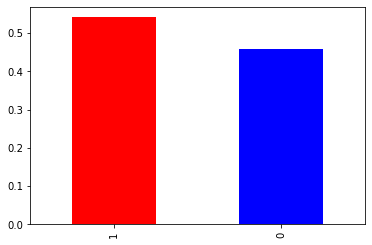

In [10]:
# Tỉ lệ các lớp trong cột output?
data_df.target.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
data_df['target'].value_counts(normalize=True) * 100

OK, như vậy là không có vấn đề gì cả. Tỉ lệ giữa các lớp cũng khá cân bằng, vậy thì ta sẽ có thể áp dụng các kỹ thuật thông thường để giải quyết bài toán này

---

## Tiền xử lý (tách các tập)

Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập validation

In [11]:
# Tách X và y
y_sr = data_df["target"] # sr là viết tắt của series
X_df = data_df.drop("target", axis=1)

In [12]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 80%:20%
train_X_df, val_X_df, train_y_sr, val_y_sr = \
                              train_test_split(X_df, y_sr, 
                                               test_size=0.2, 
                                               stratify=y_sr, 
                                               random_state=0)

In [13]:
train_X_df.shape

(193, 13)

In [14]:
train_y_sr.shape

(193,)

In [15]:
val_X_df.shape

(49, 13)

In [16]:
val_y_sr.shape

(49,)

In [17]:
train_X_df.head().index

Int64Index([214, 160, 23, 57, 206], dtype='int64')

&#9889; Mình đã cố định `random_state` trong `train_test_split` để đảm bảo kết quả của mình ra giống với của bạn. Tuy nhiên, mình không biết là với các hệ điều hành khác nhau thì điều này có được đảm bảo không. Kết quả của câu lệnh `train_X_df.head().index` của mình ra 5 giá trị là: 214, 160, 23, 57, 206. Nếu của bạn ra khác thì bạn báo lại cho mình trên moodle (hoặc zalo), vì nếu ra khác thì các kết quả lúc sau của bạn cũng sẽ khác với của mình. 

---

## Khám phá dữ liệu trên tập train

Sau khi đã tách ra các tập thì ta có thể thoải mái khám phá trên tập huấn luyện mà không lo sẽ làm kết quả trên tập validation và tập test bị mất đi sự khách quan.

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [18]:
train_X_df.dtypes

age         float64
sex          object
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. 

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [19]:
train_X_df.dtypes[train_X_df.dtypes != object]

age         float64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
dtype: object

In [20]:
pd.set_option("display.float", "{:.2f}".format)
train_X_df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,174.00,193.00,193.00,164.00,193.00,193.00,55.00,193.00,164.00,171.00,193.00,193.00
mean,55.18,1.15,131.85,245.91,0.14,0.55,147.04,0.31,1.06,1.45,0.70,2.31
std,9.08,1.64,16.51,50.38,0.35,0.54,23.36,0.46,1.22,0.61,1.00,0.62
min,29.00,0.00,100.00,131.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,120.00,211.75,0.00,0.00,131.50,0.00,0.00,1.00,0.00,2.00
50%,57.00,1.00,130.00,239.00,0.00,1.00,152.00,0.00,0.70,2.00,0.00,2.00
75%,62.00,2.00,140.00,275.25,0.00,1.00,162.50,1.00,1.80,2.00,1.00,3.00
max,76.00,9.00,180.00,417.00,1.00,2.00,182.00,1.00,6.20,2.00,4.00,3.00


---

## Tiền xử lý (tập huấn luyện) (3.5đ)

Đầu tiên, ta sẽ thêm và bỏ một số cột như sau: 
- Với cột `cp`, ta sẽ tiến hành rút trích ra cột `cp_reduced` tương ứng. Khi khám phá, bạn sẽ thấy `cp` có khá nhiều giá trị khác nhau trong tập train (bạn xem thử thì sẽ thấy có 10 giá trị, trong tập test có thể nhiều hơn), trong đó có các giá trị chỉ xuất hiện một hoặc với số lần rất ít; nếu ta để nguyên thì khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột &#8594; dễ bị overfit. Ta sẽ xử lý vấn đề này như sau: chỉ lấy `num_top_cp_values` (ví dụ, 4) giá trị xuất hiện nhiều nhất, các giá trị còn lại sẽ được thay thế bằng giá trị `-1` (Khi mô hình hóa, ta sẽ mã hóa cột này dưới dạng one-hot nên chọn giá trị nào không nằm trong `top_cp_values` để thay thế cũng được, nhưng mình sẽ thống nhất chọn giá trị `-1`). Lúc sau, ta sẽ thí nghiệm để chọn ra giá trị `num_top_cp_values` phù hợp. Sau khi xử lý cột `cp_reduced` như vừa nói, ta thêm cột này vào dataframe và bỏ cột `cp` đi.
- Bỏ cột `thalach` vì cột này có quá nhiều giá thiếu.


Class `ColAdderDropper` ở dưới đây sẽ thực hiện các bước ở trên. Vì trong các bước ở trên, có bước ta cần tính toán các giá trị từ tập huấn luyện (`num_top_cp_values` giá trị của cột "cp_reduced" mà xuất hiện nhiều nhất) và dùng các giá trị này để "transform" tập dữ liệu (có thể là tập huấn luyện, có thể là tập validation hoặc tập kiểm tra) nên ta phải tự định nghĩa một class theo dạng "transformer" của Sklearn (để lúc sau có thể dùng pipeline của Sklearn) và trong đó ta phải tự định nghĩa phương thức `fit` và `transform` (còn nếu chỉ cần "transform" tập dữ liệu mà không cần tính toán giá trị gì từ tập huấn luyện thì dùng `FunctionTransformer` như trong file "08-Demo.ipynb" sẽ tiện lợi hơn). Bạn lưu ý: phương thức `fit` chỉ được dùng trên tập huấn luyện, còn phương thức `transform` (sau khi đã `fit`) có thể được dùng cho bất kỳ tập nào.

Ở dưới, mình đã cài đặt sẵn phương thức `fit`; sau khi `fit`, các giá trị của cột `cp` cùng với số lần xuất hiện sẽ được lưu vào thuộc tính `self.cp_counts_` (khi "transform" thì không cần dùng đến thông tin này, nhưng có thể bạn sẽ muốn xem thông tin này), và `num_top_cp_values` giá trị xuất hiện nhiều nhất sẽ được lưu vào `self.top_cp_values_` (`num_top_cp_values` là siêu tham số mà phải chỉ định khi tạo ra một đối tượng thuộc class này). Nhiệm vụ của bạn là cài đặt phương thức `transform` (trong đó, sẽ cần dùng đến `self.top_cp_values_`); bạn lưu ý không làm thay đổi dữ liệu ở `X_df` truyền vào.

Ngoài ra, như bạn có thể thấy ở bên dưới, class `ColAdderDropper` được kế thừa từ 2 class của Sklearn là `BaseEstimator` và `TransformerMixin`. Việc kế thừa này giúp class của ta tự động có các phương thức như `set_params`, `get_params`, `fit_transform` (nếu không thì ta sẽ phải tự định nghĩa các phương thức này). Nếu muốn tìm hiểu thêm về cách viết class theo dạng của Sklearn, bạn có thể đọc [ở đây](https://scikit-learn.org/stable/developers/develop.html?highlight=baseestimator).

In [21]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_cp_values=3):
        self.num_top_cp_values = num_top_cp_values
        
    def fit(self, X_df, y=None):
        self.cp_counts_ = X_df['cp'].value_counts()
        cps = list(self.cp_counts_.index)
        self.top_cp_values_ = cps[:max(1, min(self.num_top_cp_values, len(cps)))]
        return self
    
    def transform(self, X_df, y=None):
        
        out_df = X_df.copy()
        # YOUR CODE HERE
        cp_reduced = out_df["cp"]
        cp_reduced[~cp_reduced.isin(self.top_cp_values_)] = -1
        out_df["cp_reduced"] = cp_reduced

        out_df.drop(['cp', 'thalach'], axis=1, inplace=True)

        out_df = out_df.sort_index(axis=1)
        return out_df

In [22]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_cp_values=3)
col_adderdropper.fit(data_df)
print(col_adderdropper.cp_counts_)
print()
print(col_adderdropper.top_cp_values_)

0    117
2     69
1     36
3      5
6      4
4      3
9      3
5      2
7      2
8      1
Name: cp, dtype: int64

[0, 2, 1]


In [23]:
# TEST TRANSFORM METHOD
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
assert set(fewer_cols_train_X_df.columns) == \
                                {'age', 'ca', 'chol', 'cp_reduced', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'trestbps'}
                                
assert np.all(fewer_cols_train_X_df['cp_reduced'].value_counts() == \
              pd.Series([94, 55, 29, 15], 
                        [0, 2, 1, -1]))
fewer_cols_train_X_df.head()

,age,ca,chol,cp_reduced,exang,fbs,oldpeak,restecg,sex,slope,thal,trestbps
214,64.00,0,335.00,2,0,0,0.00,1,NaN,2.00,2,140
160,49.00,0,271.00,1,0,0,0.00,1,female,NaN,2,134
23,59.00,1,239.00,0,1,0,NaN,0,male,1.00,3,110
57,60.00,0,NaN,2,0,1,0.00,1,female,2.00,2,120
206,65.00,0,177.00,0,0,0,0.40,1,male,2.00,3,120


Đến đây, các bạn sẽ phải rút ra danh sách các cột dạng số (numerical) và các cột không phải dạng số (categorical). Các bước tiền xử lý tiếp theo như sau:
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới. 
- Với các cột không phải dạng số và không có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=gray>(gợi ý: dùng `OneHotEncoder` trong Sklearn, để ý tham số `handle_unknown` vì khi dự đoán với các véc-tơ input mới ...)</font>.

- Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa khoảng giá trị bằng cách trừ đi mean và chia cho std của cột để giúp cho các thuật toán tối ưu Gradient Descent, LBFGS, ... hội tụ nhanh hơn <font color=gray>(gợi ý: dùng `StandardScaler` trong Sklearn)</font>.

Nhiệm vụ của bạn là tạo ra một pipeline, đặt tên là `preprocess_pipeline`, bao gồm: bước thêm cột `cp_reduced` và bỏ các cột (đã cài ở class `ColAdderDropper`, bạn để `num_top_cp_values=3`), và tất cả các bước ở đây (bạn lưu ý làm đúng theo thứ tự của các bước và các cột mà mình đã mô tả). Sau khi tạo ra được pipeline này rồi, bạn sẽ gọi phương thức `fit_transform` với đầu vào là `train_X_df` để tính các giá trị từ tập huấn luyện (ví dụ, `top_cp_values_` ở bước thêm và xóa cột, mean và mode ở bước xử lý giá trị thiếu, mean và std ở bước chuẩn hóa) và đồng thời tiền xử lý `train_X_df`; kết quả trả về sẽ là `train_X_df` sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là `preprocessed_train_X`. <font color=gray>(Gợi ý: bạn đọc cách sử dụng pipeline ở [document](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression), có thể bỏ qua mục 6.1.2; bạn sẽ cần dùng `Pipeline`/`make_pipeline` và `ColumnTransformer`/`make_column_transformer`.)</font>

In [24]:
# Các bạn tự xác định xem cột nào là numerical hoặc categorical 
# (Gợi ý: xem xét các cột có số lượng giá trị khác nhau <15 )
# YOUR CODE HERE
categorical_cols = ['ca','cp_reduced','exang','fbs','restecg','sex','slope','thal']
numerics_cols = ['age','chol','oldpeak','trestbps']

# Transformer of numerical column
imp_mean = SimpleImputer(strategy='mean')

# Transformer of categorical column
imp_mode = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder()
cat_transformer = make_pipeline(imp_mode, encoder)

# Tranformer
transformer = ColumnTransformer(transformers=[('num', imp_mean, numerics_cols),('cat', cat_transformer, categorical_cols)])
# Scaler
normalizer = StandardScaler()

#preprocess_pipeline
preprocess_pipeline = make_pipeline(col_adderdropper, transformer, normalizer)

# Fit transform
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [25]:
# TEST
assert preprocessed_train_X.shape == (193, 29)
row0 = [1.026, 1.924, -0.953, 0.495, 0.832, -0.503, -0.386, -0.269, -0.102, -0.29, -0.974, -0.421, 1.584, 0.672, -0.672,
        0.403, -0.403, -0.935, 0.974, -0.145, -0.647, 0.647, -0.234, -0.789, 0.878, -0.072, -0.269, 0.915, -0.789]
assert list(preprocessed_train_X[0].round(3)) == row0
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'chol', 'oldpeak',
                                                   'trestbps']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ca', 'cp_reduced', 'exang',
                                                   'fbs', 'restecg', 'sex',
                                                   'slope', 'thal'])])),
                ('standardscaler', StandardScaler())])

## Tiền xử lý (tập validation) (1.5đ)

Một khi đã có `preprocess_pipeline` với các giá trị thống kê đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức `transform` để tiền xử lý cho các véc-tơ input mới trong tập validation và tập kiểm tra. Dưới đây, bạn sẽ làm như vậy để tiền xử lý cho `val_X_df` và lưu kết quả vào `preprocessed_val_X`(chỉ cần duy nhất 1 dòng code thôi nhé)

In [26]:
# YOUR CODE HERE
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [27]:
# Test
assert preprocessed_val_X.shape == (49, 29)
row0 = [-1.534, -0.797, -0.953, -0.72, 0.832, -0.503, -0.386, -0.269, -0.102, -0.29, -0.974, -0.421, 1.584, 0.672, -0.672,
        0.403, -0.403, -0.935, 0.974, -0.145, 1.545, -1.545, -0.234, 1.268, -1.139, -0.072, -0.269, 0.915, -0.789]
assert list(preprocessed_val_X[0].round(3)) == row0


Giải thích tại sao không nên làm 2 cách sau:
- Tiền xử lý tập validation bằng các giá trị thống kê (mean, mode, ...) được tính từ tập validation
- Hoặc tiền xử lý tất cả dữ liệu rồi mới tách tập validation

YOUR ANSWER HERE

Ta phải giữ tập validation và tập test ngoài quá trình tiền xử lý (model fit với dữ liệu) để việc đánh giá quá trình tiền xử lý khách quan. Nếu ta làm 1 trong 2 cách trên quá trình tiền xử lý có thể sai với thực tế vì việc đánh giá lúc này không còn tác dụng.


---

## Tiền xử lý + mô hình hóa

### Tìm mô hình tốt nhất (4đ)

Ta sẽ sử dụng mô hình MLP để phân lớp. Bạn sẽ tạo ra một pipeline từ đầu đến cuối bao gồm: các bước tiền xử lý ở trên + MLP (với các siêu tham số `hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0, max_iter=10000`). Bạn đặt tên cho pipeline này là `full_pipeline`. Việc tạo ra một pipeline từ đầu đến cuối như này có các lợi ích sau:
- Giúp đơn giản hóa: 
    - Để huấn luyện từ đầu tới cuối, chỉ cần gọi phương thức `fit` của pipeline này trên tập huấn luyện dạng thô. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `fit_transform`, còn "classifier" ở cuối sẽ gọi `fit`.
    - Với các véc-tơ input ở dạng thô, để dự đoán thì chỉ cần gọi phương thức `predict` của pipeline. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `transform`, còn "classifier" ở cuối sẽ gọi `predict`.
- Giúp tránh tiền xử lý tập validation/kiểm-tra sai cách (như đã nói ở mục "Tiền xử lý (tập validation)" ở trên). Để làm sai cũng khó à nha ;-).
- Giúp dễ dàng thử nghiệm đồng thời các giá trị của các siêu tham số ở các bước trong pipeline (sẽ làm ở ngay dưới).

Sau khi đã có được pipeline từ đầu đến cuối này, bạn sẽ thử nghiệm:
- Siêu tham số `alpha` (hệ số L2 regularization) của `MLPClassifier` với 5 giá trị khác nhau: từ 0 đến 100.
- Siêu tham số `num_top_cp_values` của `ColAdderDropper` (ở bước tiền xử lý) với 5 giá trị khác nhau: 1, 3, 5, 7, 9.

Để gán lại giá trị `alpha` và `num_top_cp_values` cho `full_pipeline`, bạn sẽ dùng phương thức `set_params`: 

`full_pipeline.set_params(mlpclassifier__alpha=...)`

Nếu bạn tạo pipeline bằng `make_pipeline` thì tên của các bước sẽ được tự động lấy là tên của các class và được viết thường như 2 tên ở trên. Còn nếu bạn dùng `Pipeline` và tự đặt tên cho các bước thì bạn dùng tên của bạn trong phương thức `set_params`.  

Như vậy, với mỗi mô hình bạn sẽ: huấn luyện trên tập huấn luyện, tính độ đo ở đây là độ chính xác (tỉ lệ dự đoán đúng) trên tập huấn luyện và tập validation rồi `append` độ đo vào 2 list tương ứng là `train_accs` và `val_accs` (để dễ nhìn, bạn tính độ chính xác theo đơn vị %, nghĩa là có giá trị từ 0-100 chứ không phải từ 0-1). Bạn lưu lại độ chính xác cao nhất trên tập validation và giá trị `alpha` và `num_top_cp_values` tương ứng lần lượt vào biến `best_val_acc`, `best_alpha`, `best_num_top_cp_values`.

In [28]:
# Tạo full_pipeline
# YOUR CODE HERE
mlpclassifier = MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0, max_iter=10000)
full_pipeline = make_pipeline(col_adderdropper, transformer, normalizer, mlpclassifier)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số (toàn bộ quá trình có thể mất từ 2-3 phút)
# và chọn ra các giá trị tốt nhất
train_accs = []
val_accs = []
alphas = [0,0.01,0.1, 1, 10, 100]
num_top_cp_values_s = [1, 3, 5, 7,9]
best_val_acc = 0
best_alpha = None
best_num_top_cp_values = None
for alpha in alphas:
    for num_top_cp_values in num_top_cp_values_s:
        # YOUR CODE HERE
        full_pipeline.set_params(coladderdropper__num_top_cp_values = num_top_cp_values, mlpclassifier__alpha = alpha)
        full_pipeline.fit(train_X_df, train_y_sr)

        train_score = full_pipeline.score(train_X_df, train_y_sr) *100
        val_score = full_pipeline.score(val_X_df, val_y_sr) *100

        train_accs.append(train_score)
        val_accs.append(val_score)

        if val_score > best_val_acc:
            best_val_acc = val_score
            best_alpha = alpha
            best_num_top_cp_values = num_top_cp_values
        
'Finish!'

'Finish!'

In [29]:
# TEST
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_cp_values=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'chol', 'oldpeak',
                                                   'trestbps']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ca', 'cp_reduced', 'exang',
                                                   'fbs', 'restecg', 'sex',
                                                   'slope', 'thal'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=100, hidden_layer_sizes=50, max_iter=10000,
                               random_state=0, solver='lbfgs'))])

In [30]:
# TEST
assert round(best_val_acc, 2) == 85.71
assert best_alpha == 1
assert best_num_top_cp_values == 3

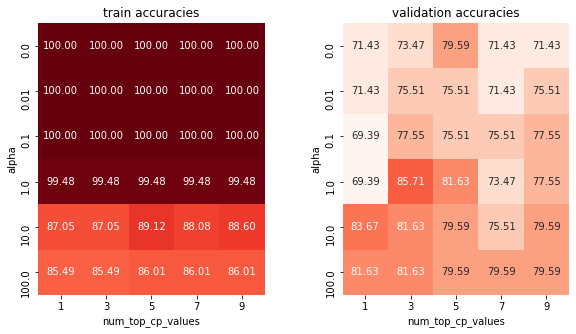

In [31]:
# Trực quan hóa kết quả
train_accs_df = pd.DataFrame(data=np.array(train_accs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_cp_values_s)
val_accs_df = pd.DataFrame(
    data=np.array(val_accs).reshape(len(alphas), -1), 
    index=alphas, columns=num_top_cp_values_s)
min_err = min(min(train_accs), min(val_accs))
max_err = max(max(train_accs), max(val_accs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('train accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('validation accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha');

Nhận xét về ảnh hưởng của siêu tham số `alpha` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `alpha` thay đổi thì độ chính xác trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?

YOUR ANSWER HERE <br>
Giá trị alpha khoảng 1% cho kết quả có độ chính xác trên tập validation lớn nhất

Nhận xét về ảnh hưởng của siêu tham số `num_top_cp_values` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `num_top_cp_values` thay đổi thì độ chính xác trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?



```
# Định dạng của đoạn này là mã
```

YOUR ANSWER HERE <br>
num_top_cp_values tăng nhiều thì độ chính xác giảm dần và tốt nhất ở 3

Cuối cùng, bạn sẽ huấn luyện lại `full_pipeline` trên `X_df` và `y_sr` (tập huấn luyện + tập validation) với `best_alpha` và `best_num_top_cp_values` tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [32]:
# YOUR CODE HERE
full_pipeline.set_params(coladderdropper__num_top_cp_values=best_num_top_cp_values, mlpclassifier__alpha=best_alpha)
full_pipeline.fit(X_df, y_sr)

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'chol', 'oldpeak',
                                                   'trestbps']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ca', 'cp_reduced', 'exang',
                                                   'fbs', 'restecg', 'sex',
                                                   'slope', 'thal'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=10000,
                               random_state=0, solver='lbfgs'))])

### Đánh giá mô hình tìm được (1đ)
Bạn sẽ dùng mô hình cụ thể cuối cùng ở trên để dự đoán với các input trong tập test (file "lab03_test.csv"). Để mình có thể chấm điểm (so sánh với groundtruth đã bị ẩn) thì bạn phải tạo ra file csv có 1 cột `target` duy nhất là giá trị dự đoán của bạn (1 - có bệnh, và 0 - không). Bạn đặt tên file của bạn là `my_preds.csv`.

In [33]:
test_X_df = pd.read_csv("lab03_test.csv")

In [34]:
test_X_df.to_csv("lab03_test.csv",index=False)

In [35]:
# YOUR CODE HERE
test_Y_arr = full_pipeline.predict(test_X_df)
test_Y_sr = pd.Series(test_Y_arr,name='target')
test_Y_sr.to_csv('my_preds.csv', index=False)

In [36]:
# TEST
my_preds_df = pd.read_csv('my_preds.csv')
assert round(my_preds_df['target'].mean(), 3) == 0.574
assert np.all(my_preds_df.iloc[:5].values.reshape(-1) == \
                                     np.array([0, 0, 1, 0, 0]))

### Thí nghiệm với các mô hình phân lớp khác (Bonus, tối đa 2đ).

Trong phần này, các bạn có thể thử các mô hình phân lớp khác với MLP ở phần trên để tối ưu độ chính xác trên tập validation (hoặc test) nhất có thể. 

Các bạn có thể thử trên subset của các features để tìm ra bộ features tối ưu nhất. Hoặc Các bạn cũng có thể thử **tinh chỉnh** các siêu tham số của mô hình MLP ở trên để tìm ra bộ tham số tối ưu hơn (chẳng hạn như `hidden_layer`, `activation`, `solver`, `learning_rate`). Bạn nào có kết quả trên tập test (của mình) càng cao thì càng được nhiều điểm nhé 💪💪💪


In [37]:
%%time
# YOUR CODE HERE
mlpclassifier = MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0, max_iter=10000)
full_pipeline = make_pipeline(col_adderdropper, transformer, normalizer, mlpclassifier)
full_pipeline.set_params(coladderdropper__num_top_cp_values = 3, mlpclassifier__alpha = 3.1)
full_pipeline.fit(train_X_df, train_y_sr)
val_score = full_pipeline.score(val_X_df, val_y_sr) *100
val_score

Wall time: 2.99 s


87.75510204081633